In [4]:
import MySQLdb as mdb
import pandas
%matplotlib inline 
import matplotlib.pyplot as plt


#-----------Functions Defined -----------------------------------#


#-------------Getting DB Connection Function - Returns Connection --------#
def get_db_connection(config):
    #Creating connection to MYSQL DB
    try:
        con = mdb.connect(host = config["host"], 
                      user = config["user"], 
                      passwd = config["passwd"], 
                      db = config["db"], 
                      charset='utf8', use_unicode=True);
    except :
            print("Oops!  DB Connection Error!!!")

    return con

#--------------Get Cursor for seleted DB ---------------------#

def get_cursor(con):
    try:
    #DB  Name defined

        cur = con.cursor(mdb.cursors.DictCursor)
    except :
            print("Oops!  Cursor Fetch Error!!!")
            
    return cur

def close_db_connection(con):
    try:
    #DB  Name defined

        con.close()
    except :
            print("Oops!  Cannot close connection!!!")
        
#-------------End of Functions ---------------------------------#        


config = {}
execfile("config_1.txt", config)


try:
#DB  Name defined
    
    con = get_db_connection(config)
    cur = get_cursor(con)
    #cur = con.cursor(mdb.cursors.DictCursor)
except :
        print("Oops!  Cursor Fetch Error!!!")

cur.execute(config["selecttweetbyuserquery"])

tweets =  cur.fetchall()
cur.close()
close_db_connection(con)

df_tweets = pandas.DataFrame(list(tweets))
df_tweets






,idTweetsList,location,screename,tweetstext,username
0,751879284034265088,Montreal,Siiddhuu,RT @SputnikInt: Was Clinton too dumb to jail? ...,Siddharth
1,751879284289974272,,MatthewDigesti,RT @SenaHillNYC: Blockchain in new political d...,Matthew Digesti
2,751879290350895104,,Stephxniecarter,RT @DylansFreshTake: •Cops Killing People\n•Pe...,Steph
3,751879294469574656,Planet Earth,vince_bugge,RT @GovMikeHuckabee: Man who swore if we liked...,Vin
4,751879302275174400,,v_verite,RT @twittingduster: Jim Jordan: Hillary Clinto...,A.J.
5,751879308097032193,"Philadelphia, PA",Barb4TRUMP,"RT @AllenWestRepub ""U.S. Marine Will Cite The ...",I Stand With Trump!
6,751879314166001664,"Forney, TX",JoelSmith015,RT @Enquirer: Column: @HillaryClinton should n...,Joel Austin
7,751879315646771200,"Long Beach, MS",FreeLifesMatter,Many more Police officers will be killed if #H...,LiveFreeOrElse...
8,751879316183457792,"California, USA",JOHNGARCIA1152,RT @AIIAmericanGirI: Hillary swears never any ...,John Garcia
9,751879318800826368,"Atlanta, GA",PattyWheeler12,RT @Pen_Air: Hillary to the LGBT community: I ...,Patty Wheeler12


In [5]:
config = {}
execfile("config_1.txt", config)

try:
#DB  Name defined
    
    con = get_db_connection(config)
    cur = get_cursor(con)
    #cur = con.cursor(mdb.cursors.DictCursor)
except :
        print("Oops!  Cursor Fetch Error!!!")
        
cur.execute(config["tweettypebysubjects"])

tweets =  cur.fetchall()
cur.close()
close_db_connection(con)
print tweets
df_tweets = pandas.DataFrame.from_records(list(tweets))
df_tweets

({'Count': 90L, 'Positive/Negative': u'N', 'Candidate': u'H'}, {'Count': 68L, 'Positive/Negative': u'P', 'Candidate': u'H'}, {'Count': 67L, 'Positive/Negative': u'N', 'Candidate': u'T'}, {'Count': 37L, 'Positive/Negative': u'P', 'Candidate': u'T'})


,Candidate,Count,Positive/Negative
0,H,90,N
1,H,68,P
2,T,67,N
3,T,37,P


In [13]:
#df_graph = df_tweets.groupby(['Candidate','Positive/Negative'])
#df_graph
#df_comp = pandas.crosstab([df_tweets['Candidate'], df_graph['Positive/Negative']])
#df_graph.plot(kind='bar', stacked=True, color=['red','blue'])
#df_tweets.groupby(['Candidate','Positive/Negative']).plot(kind='bar', stacked=True, color=['blue','green'])
config = {}
execfile("config_1.txt", config)

try:
#DB  Name defined
    
    con = get_db_connection(config)
    cur = get_cursor(con)
    #cur = con.cursor(mdb.cursors.DictCursor)
except :
        print("Oops!  Cursor Fetch Error!!!")
        
cur.execute(config["tweettypebysubjectswocount"])

tweets =  cur.fetchall()
cur.close()

close_db_connection(con)
#print tweets
df_tweets = pandas.DataFrame.from_records(list(tweets))
df_tweets
df_grpby = df_tweets.groupby(['Candidate','Positive/Negative'])['Positive/Negative'].count().unstack('Positive/Negative').fillna(0)
#df_grpby = df_tweets.groupby(['Candidate','Positive/Negative'])['Candidate'].count().unstack('Candidate').fillna(0)
df_grpby



Positive/Negative,N,P
Candidate,,
H,90,68
T,67,37


In [8]:
#--- Added New ----
#df_count  = df_tweets.groupby(['Candidate','Positive/Negative'])['Candidate'].count()
#df_count
#df_count.groupby(['Candidate']).mean()

Candidate  Positive/Negative
H          N                    90
           P                    68
T          N                    67
           P                    37
Name: Candidate, dtype: int64

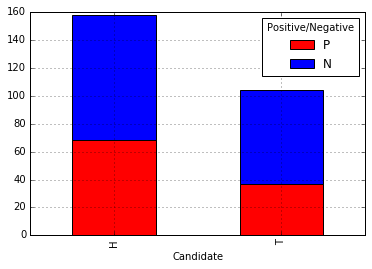

In [15]:
#df_grpby.groupby([['N','P']], 'Positive/Negative']).mean()
df_grpby[['P','N']].plot(kind='bar', stacked=True, color=['red','blue'],grid=True)